**Submitted by -- **

Saurabh Mehra (23EC65R06)

Anshu Pal (23EC65R04)



In [ ]:
!git clone https://github.com/ClementPinard/FlowNetPytorch.git
!pip install path
!pip install -r FlowNetPytorch/requirements.txt
!gdown --folder https://drive.google.com/drive/folders/16eo3p9dO_vmssxRoZCmWkTpNjKRzJzn5

Cloning into 'FlowNetPytorch'...
remote: Enumerating objects: 529, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 529 (delta 7), reused 13 (delta 7), pack-reused 512
Receiving objects: 100% (529/529), 1.21 MiB | 15.52 MiB/s, done.
Resolving deltas: 100% (303/303), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-no

Retrieving folder contents
Processing file 1H_5WE-Lrx5arD0-X801yRzdSAuBZQmXh flownetc_EPE1.766.pth
Processing file 1396GYc-XdxNLdg8STprmE0RcN_Sza8p_ flownets_bn_EPE2.459.pth
Processing file 1jbWiY1C_nqAUJRYZu7mwzV6CK7ugsa5v flownets_EPE1.951.pth
Processing file 1134m2_MSLCrcjk6oJSogwDPdulu-ZR_N flownets_from_caffe.pth
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1H_5WE-Lrx5arD0-X801yRzdSAuBZQmXh
From (redirected): https://drive.google.com/uc?id=1H_5WE-Lrx5arD0-X801yRzdSAuBZQmXh&confirm=t&uuid=9fa6436f-47c1-4a5a-bb59-c93347ff7271
To: /content/pytorch/flownetc_EPE1.766.pth
100% 157M/157M [00:01<00:00, 111MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1396GYc-XdxNLdg8STprmE0RcN_Sza8p_
From (redirected): https://drive.google.com/uc?id=1396GYc-XdxNLdg8STprmE0RcN_Sza8p_&confirm=t&uuid=7b5e6b27-625f-49f3-a32b-138afff3fd2d
To: /content/pytorch/flownet

In [ ]:
!python3 FlowNetPytorch/run_inference.py Data pytorch/flownetc_EPE1.766.pth

/content/FlowNetPytorch/models/util.py:10: ImportWarning: failed to load custom correlation modulewhich is needed for FlowNetC
  warnings.warn("failed to load custom correlation module"
=> will save raw output and RGB visualization
=> fetching img pairs in 'Data'
=> will save everything to Data/flow
0 samples found
Traceback (most recent call last):
  File "/content/FlowNetPytorch/run_inference.py", line 118, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/FlowNetPytorch/run_inference.py", line 80, in main
    network_data = torch.load(args.pretrained)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1040, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1268, in _legacy_load
    result = unpickler.load()
 

In [ ]:
import cv2
import os

folder_path = 'GT'
images = os.listdir(folder_path)

for image in images:
    image_path = os.path.join(folder_path, image)
    image_arr = cv2.imread(image_path)
    image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)

    new_image_path = os.path.join(folder_path, image.split('.')[0] + '_new.' + image.split('.')[-1])
    cv2.imwrite(new_image_path, cv2.cvtColor(image_arr, cv2.COLOR_RGB2BGR))




In [ ]:
import numpy as np
from skimage.transform import resize

def mse_cal(flow, gt):
    # Ensure both flow and gt are 2D arrays
    flow = np.atleast_2d(flow)
    gt = np.atleast_2d(gt)

    # Convert to grayscale if input is RGB
    if flow.ndim == 3:
        flow = np.sqrt(np.sum(flow**2, axis=2))
    if gt.ndim == 3:
        gt = np.sqrt(np.sum(gt**2, axis=2))

    # Resize gt if sizes mismatch
    if gt.shape != flow.shape:
        gt = resize(gt, flow.shape, anti_aliasing=True)

    # Calculate Mean Squared Error
    mse = np.mean((flow - gt)**2)
    return mse


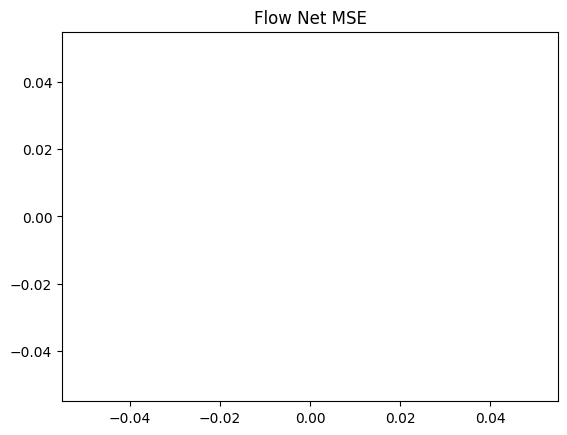

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_flow_gt(gt_folder_path, flow_est_folder_path, flow_item):
    img_no = flow_item[1:-9]
    gt_name = f'GT{img_no}.npy'
    gt_path = os.path.join(gt_folder_path, gt_name)
    flow_path = os.path.join(flow_est_folder_path, flow_item)

    gt = np.load(gt_path)
    flow = np.load(flow_path)

    return flow, gt

def calculate_mse(flow, gt):
    return np.mean((flow - gt) ** 2)

gt_folder_path = 'GT'
flow_est_folder_path = 'Data/flow'

flow_est_path = [item for item in os.listdir(flow_est_folder_path) if item != '.ipynb_checkpoints']
mse_arr = []

for flow_item in flow_est_path:
    flow, gt = load_flow_gt(gt_folder_path, flow_est_folder_path, flow_item)
    mse = calculate_mse(flow, gt)
    mse_arr.append(mse)
    print(f"MSE for {flow_item}: {mse}")

plt.figure()
plt.plot(mse_arr)
plt.title('Flow Net MSE')
plt.show()


In [1]:
!pip install PyAV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 29.6 MB/s eta 0:00:00


In [3]:
import tempfile
from pathlib import Path
from urllib.request import urlretrieve
from torchvision.io import read_video



video_path = "/content/saurabh.mp4"

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torchvision.transforms as T

plt.rcParams["savefig.bbox"] = "tight"

def plot(imgs, **imshow_kwargs):
    fig, axs = plt.subplots(nrows=len(imgs), ncols=len(imgs[0]), squeeze=False)

    for i, row in enumerate(imgs):
        for j, img in enumerate(row):
            ax = axs[i, j]
            img_pil = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img_pil), **imshow_kwargs)
            ax.axis('off')

    plt.tight_layout()



/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


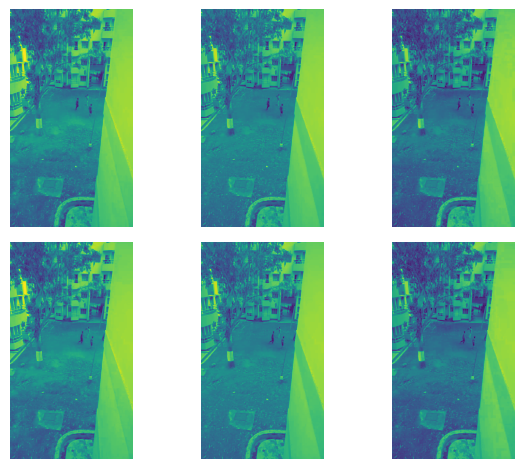

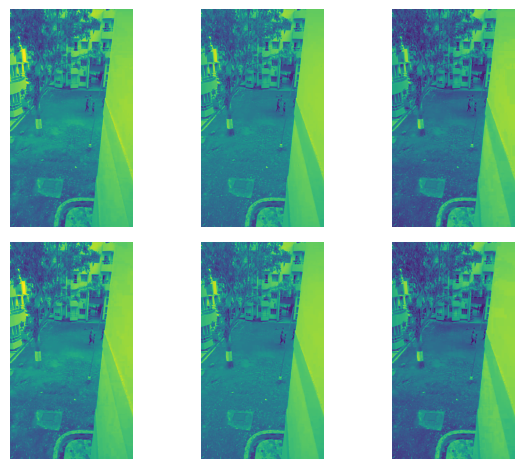

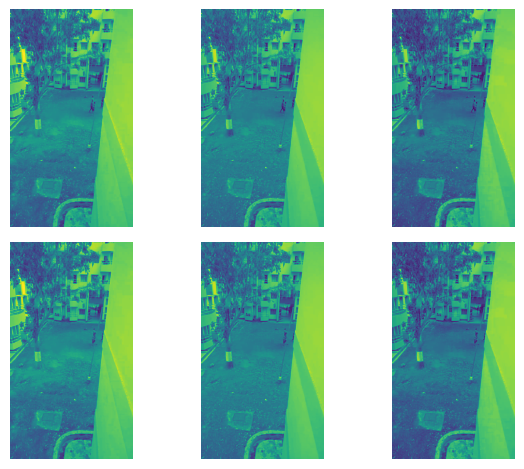

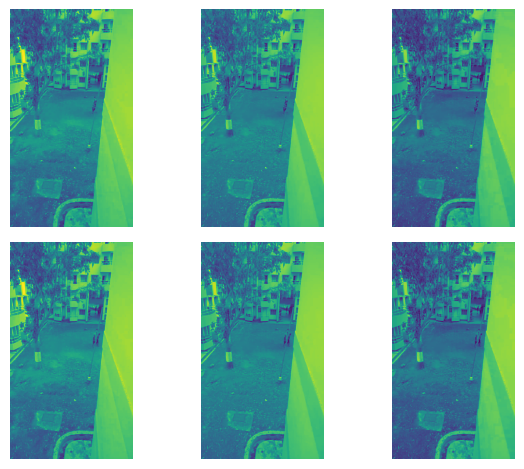

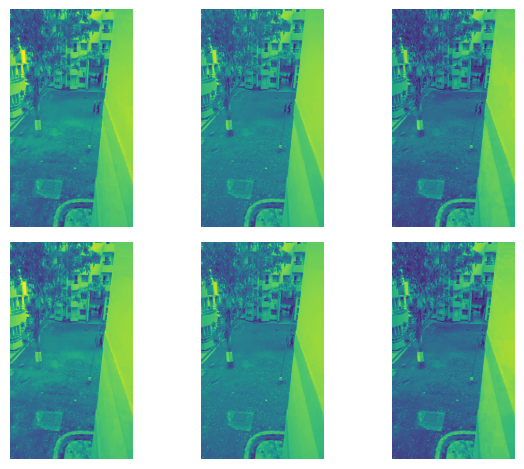

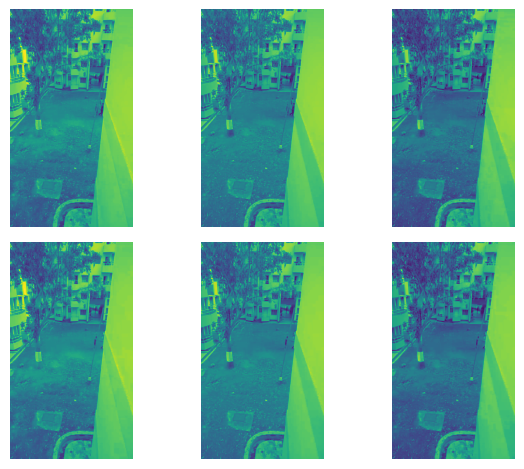

In [8]:
from torchvision.io import read_video
frames, _, _ = read_video(str(video_path))
frames = frames.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

img1_batch = torch.stack([frames[10], frames[30]])
img2_batch = torch.stack([frames[50], frames[65]])
img3_batch = torch.stack([frames[70], frames[85]])
img4_batch = torch.stack([frames[90], frames[105]])
img5_batch = torch.stack([frames[110], frames[125]])
img6_batch = torch.stack([frames[130], frames[145]])


plot(img1_batch)
plot(img2_batch)
plot(img3_batch)
plot(img4_batch)
plot(img5_batch)
plot(img6_batch)

In [23]:
import torch
import torchvision.transforms.functional as TF
from PIL import Image

# Define target dimensions
target_width = 512
target_height = 384

# Loop through image batches
for i, (img1, img2) in enumerate(zip(img1_batch, img2_batch)):


    img1_pil = TF.to_pil_image(img1)
    img2_pil = TF.to_pil_image(img2)


    img1_resized = TF.resize(img1_pil, (target_height, target_width))
    img2_resized = TF.resize(img2_pil, (target_height, target_width))


    img1_resized.save(f'img1_{i}.ppm')
    img2_resized.save(f'img2_{i}.ppm')


In [26]:
import torch
import torchvision.transforms as T

def preprocess(batch):

    transforms = T.Compose([
        T.ConvertImageDtype(torch.float32),
        T.Normalize(mean=0.5, std=0.5),
        T.Resize(size=(520, 960)),            # Resize image
    ])
    # Apply transformations to the batch
    batch = transforms(batch)
    return batch


device = "cuda" if torch.cuda.is_available() else "cpu"


img1_batch = preprocess(img1_batch).to(device)
img2_batch = preprocess(img2_batch).to(device)

# Print the shape and data type of img1_batch
print(f"shape = {img1_batch.shape}, dtype = {img1_batch.dtype}")


shape = torch.Size([2, 3, 520, 960]), dtype = torch.float32


In [27]:
import torch
from torchvision.models.optical_flow import raft_large


model = raft_large(pretrained=True, progress=False).to(device)
model.eval()


list_of_flows = model(img1_batch.to(device), img2_batch.to(device))


print(f"Type of list_of_flows: {type(list_of_flows)}")
print(f"Number of iterations of the model: {len(list_of_flows)}")


type = <class 'list'>
length = 12 = number of iterations of the model


In [28]:

predicted_flows = list_of_flows[-1]


print(f"Data type of predicted_flows: {predicted_flows.dtype}")


print(f"Shape of predicted_flows: {predicted_flows.shape} (N, 2, H, W)")


print(f"Minimum value: {predicted_flows.min()}, Maximum value: {predicted_flows.max()}")


dtype = torch.float32
shape = torch.Size([2, 2, 520, 960]) = (N, 2, H, W)
min = -14.395938873291016, max = 69.94223022460938


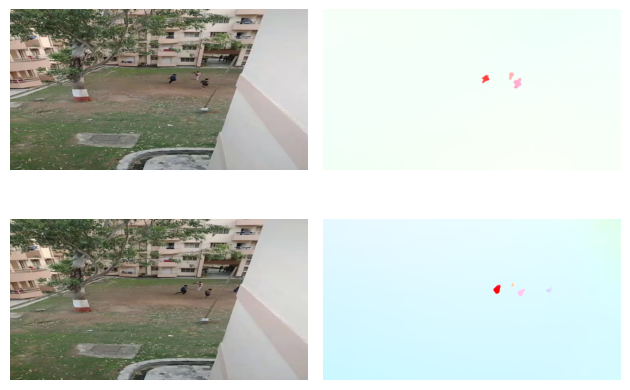

In [29]:
from torchvision.utils import flow_to_image


flow_imgs = flow_to_image(predicted_flows)


img1_batch_normalized = [(img1 + 1) / 2 for img1 in img1_batch]

grid = [[img1, flow_img] for img1, flow_img in zip(img1_batch_normalized, flow_imgs)]


plot(grid)
